In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *
import numpy as np
import pandas as pd
from markov_models.experiments import exp1

from utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

from mpl_toolkits.axes_grid1 import make_axes_locatable
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(7)]

main_folder = 'availability_matrices/av-mat-3'

formatted_array = [i for i in range(n_rounds)]

In [3]:
def pipeline(exp_type, key_word, folder):
    res_exp = res[exp_type]

    availability_matrix = pd.DataFrame(res_exp, index = countries, columns = formatted_array)

    plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
    availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

    print("Clients' participation frequencies: ", res_exp.mean(axis=1))

    lam2_list, corr = av_mat_corr(availability_matrix)
    print('Countries lambda_2: ',list(np.round(lam2_list, 2)))
    print('Mean lambda_2: ',np.round(corr, 2))

    t_corr_list, t_corr_mean, sp_corr_dict, sp_corr_mean = av_mat_p_corr(availability_matrix)
    print('Pearson Correlation:')
    print('Time list: ',list(np.round(t_corr_list, 2)))
    print('Time mean: ',np.round(t_corr_mean, 2))
    print('Spatial dict: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    print('Spatial mean: ',np.round(sp_corr_mean, 2))

    # p_corr_list, p_corr = av_mat_p_corr(availability_matrix)
    # print('Countries p_corr: ',list(np.round(p_corr_list, 2)))
    # print('Mean p_corr: ',np.round(p_corr, 2))

    # sp_corr_dict, sp_corr = av_mat_spatial_corr(availability_matrix)
    # print('Countries p_corr: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    # print('Mean p_corr: ',np.round(sp_corr, 2))

In [4]:
res = exp1(t=50, T=100,_eps=0.25)
sub_folder='50perc'

# Correlated case

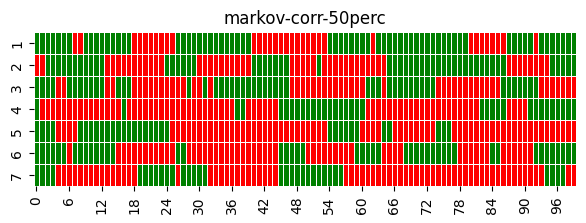

Clients' participation frequencies:  [0.67 0.52 0.49 0.34 0.32 0.46 0.32]
Countries lambda_2:  [0.73, 0.78, 0.66, 0.77, 0.78, 0.71, 0.78]
Mean lambda_2:  0.75
Pearson Correlation:
Time list:  [0.73, 0.78, 0.66, 0.77, 0.79, 0.71, 0.79]
Time mean:  0.75
Spatial dict:  {'1-2': -0.08, '1-3': 0.18, '1-4': -0.17, '1-5': 0.12, '1-6': 0.18, '1-7': -0.25, '2-3': 0.06, '2-4': -0.2, '2-5': -0.2, '2-6': 0.28, '2-7': -0.16, '3-4': -0.32, '3-5': -0.11, '3-6': -0.02, '3-7': -0.33, '4-5': -0.13, '4-6': 0.1, '4-7': 0.28, '5-6': 0.01, '5-7': 0.13, '6-7': -0.03}
Spatial mean:  -0.03


In [5]:
pipeline(exp_type=CORR, key_word='markov-corr-50perc', folder=main_folder+'/'+sub_folder)

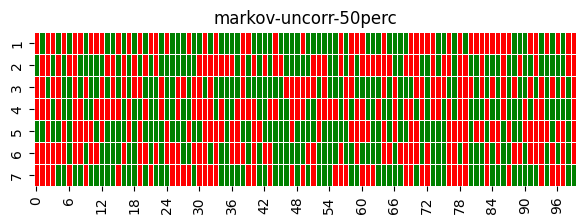

Clients' participation frequencies:  [0.52 0.52 0.54 0.48 0.54 0.49 0.57]
Countries lambda_2:  [-0.05, -0.03, -0.18, -0.09, 0.04, -0.05, 0.11]
Mean lambda_2:  -0.04
Pearson Correlation:
Time list:  [-0.05, -0.03, -0.18, -0.09, 0.04, -0.05, 0.11]
Time mean:  -0.04
Spatial dict:  {'1-2': -0.08, '1-3': -0.12, '1-4': -0.04, '1-5': 0.32, '1-6': 0.06, '1-7': 0.01, '2-3': -0.04, '2-4': 0.08, '2-5': -0.04, '2-6': 0.06, '2-7': -0.11, '3-4': 0.08, '3-5': -0.13, '3-6': -0.06, '3-7': -0.03, '4-5': -0.04, '4-6': -0.06, '4-7': 0.07, '5-6': 0.06, '5-7': 0.01, '6-7': 0.08}
Spatial mean:  0.0


In [6]:
pipeline(exp_type=UNCORR, key_word='markov-uncorr-50perc', folder=main_folder+'/'+sub_folder)

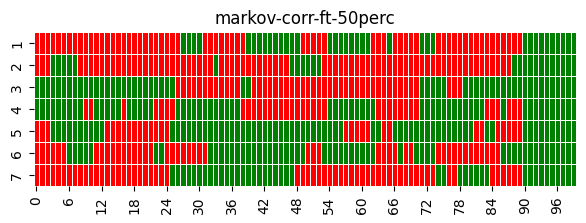

Clients' participation frequencies:  [0.36 0.24 0.54 0.63 0.71 0.54 0.41]
Countries lambda_2:  [0.76, 0.82, 0.88, 0.7, 0.72, 0.73, 0.86]
Mean lambda_2:  0.78
Pearson Correlation:
Time list:  [0.76, 0.81, 0.88, 0.7, 0.73, 0.74, 0.85]
Time mean:  0.78
Spatial dict:  {'1-2': 0.16, '1-3': -0.23, '1-4': 0.1, '1-5': 0.2, '1-6': 0.48, '1-7': 0.35, '2-3': 0.19, '2-4': 0.04, '2-5': 0.26, '2-6': 0.24, '2-7': 0.1, '3-4': 0.21, '3-5': -0.28, '3-6': -0.13, '3-7': -0.09, '4-5': -0.03, '4-6': -0.08, '4-7': 0.13, '5-6': 0.21, '5-7': 0.44, '6-7': 0.16}
Spatial mean:  0.12


In [7]:
pipeline(exp_type=CORR_FT, key_word='markov-corr-ft-50perc', folder=main_folder+'/'+sub_folder)

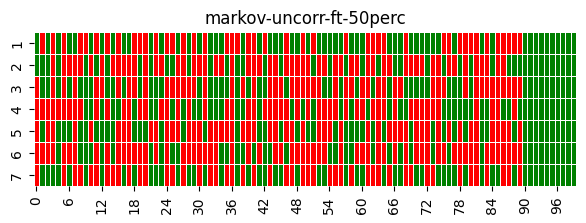

Clients' participation frequencies:  [0.56 0.43 0.49 0.48 0.48 0.39 0.53]
Countries lambda_2:  [-0.06, -0.03, 0.09, 0.09, 0.01, 0.09, -0.11]
Mean lambda_2:  0.01
Pearson Correlation:
Time list:  [-0.06, -0.03, 0.09, 0.09, 0.01, 0.09, -0.12]
Time mean:  0.01
Spatial dict:  {'1-2': -0.0, '1-3': 0.22, '1-4': 0.0, '1-5': 0.0, '1-6': 0.25, '1-7': 0.26, '2-3': 0.16, '2-4': 0.1, '2-5': 0.14, '2-6': 0.18, '2-7': 0.13, '3-4': 0.18, '3-5': 0.1, '3-6': 0.32, '3-7': 0.16, '4-5': 0.04, '4-6': 0.22, '4-7': -0.02, '5-6': 0.26, '5-7': 0.26, '6-7': 0.1}
Spatial mean:  0.15


In [8]:
pipeline(exp_type=UNCORR_FT, key_word='markov-uncorr-ft-50perc', folder=main_folder+'/'+sub_folder)

## Tests to verify the participation frequency in the correlated case

(array([  6.,  38., 113., 165., 193., 125.,  52.,   7.,   1.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 9 artists>)

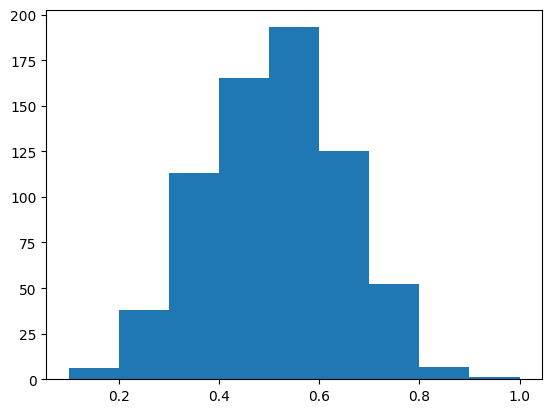

In [9]:
fin_res = [
    exp1(t=50, T=100, k=10, _eps=0.25)['corr']
    for _ in range(100)
]
tmp = np.sum(np.vstack(fin_res), axis=-1)/100

plt.hist(tmp, bins=[(i+1)/10 for i in range(10)])
# plt.savefig("Corr_0_01__1.png")

In [10]:
# plt.figure(figsize=(12, 12))  # Set the figure size here
# plt.imshow(tmp, cmap='binary')  # Display the image
# plt.savefig("tmp.png")